In [1]:
!pip -q install download

In [2]:
import download

download.download('https://github.com/oelin/misc/raw/main/overfit_image_encoder.pt', 'xae.pt')


file_sizes: 100%|██████████████████████████| 2.17M/2.17M [00:00<00:00, 82.2MB/s]
Successfully downloaded file to xae.pt


'xae.pt'

In [3]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from zipfile import ZipFile


class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, kernel_size=4, stride=2, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Autoencoder().to(device)
model.load_state_dict(torch.load('./xae.pt'))

<All keys matched successfully>

In [ ]:
from PIL import Image

def show_image(tensor, scale=1, rotate=-90):
    tensor = tensor.T.cpu().detach().numpy()
    tensor = (tensor * 255).astype('uint8')
    tensor = tensor.repeat(scale, 0).repeat(scale, 1)

    return Image.fromarray(tensor).rotate(rotate)

In [ ]:
import matplotlib.pyplot as plt


def show_encoding(tensor, channel=0):
  return plt.imshow(encoding[channel].cpu().detach().numpy())

In [ ]:
import numpy as np
import time

def load_image(path):

  image = Image.open(path).resize((1024, 1024))
  image = np.array(image)

  r = np.array([x[0] for x in image.reshape(-1, 3)]).reshape(1024, 1024)
  g = np.array([x[1] for x in image.reshape(-1, 3)]).reshape(1024, 1024)
  b = np.array([x[2] for x in image.reshape(-1, 3)]).reshape(1024, 1024)

  image = np.array([r, g, b])
  image = torch.tensor(image)

  return image / 255


def download_image(url):
  path = str(time.time()) + '.jpg'
  download.download(url, path)
  return load_image(path)


file_sizes: 131kB [00:00, 3.13MB/s]                                             
Successfully downloaded file to 1676862388.4657555.jpg


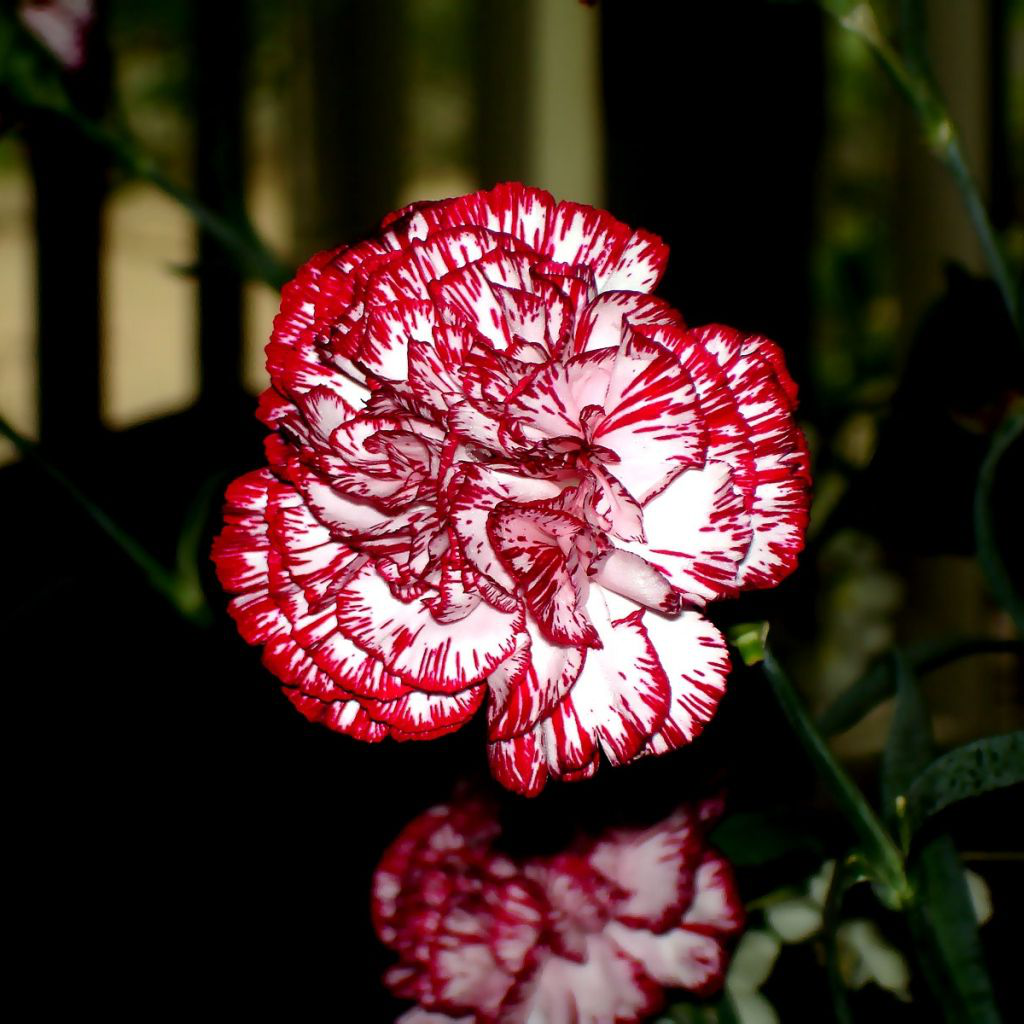

In [ ]:
image = download_image('https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi.pinimg.com%2Foriginals%2F74%2F05%2F62%2F7405626d4b60f64394c0b727708b9e08.jpg&f=1&nofb=1&ipt=b6e22e2751a04856601322b5f063e1eb8801a37a99d10bcdc1072e67782a30dd&ipo=images')
show_image(image)

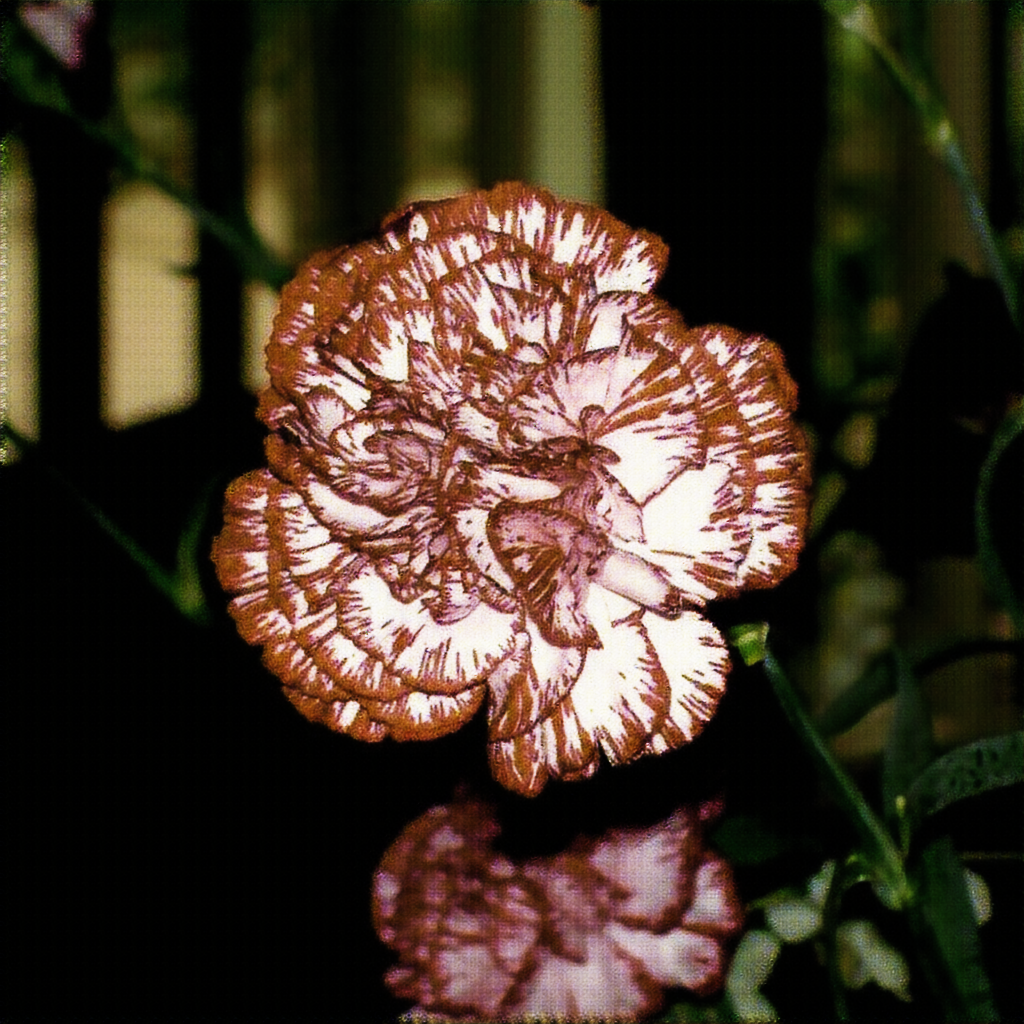

In [ ]:
show_image(model(image.to(device)))

In [ ]:
encoding = model.encoder(image.to(device))

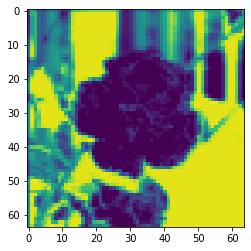

In [ ]:
show_encoding(encoding, 23)

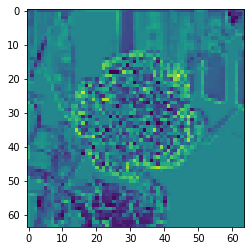

In [ ]:
show_encoding(encoding, 33)